For this particular Project I have used the location data from Foursquare and also I have been using the Wikipedia page of neighborhoods. 
I have clustered all neighboors and then I have made a simple Linnear Regression to find wich one of the Parisien was the most likely to mine. 
It is a very simple Project, I didn't complicate myself.  

In [63]:
import geocoder
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from scipy.spatial import distance
from sklearn.linear_model import LinearRegression

In [64]:
df = pd.read_excel("ParisZaragoza .xlsx")
df

,Distrito,Nombre,Área (km²),Población (1999),Población (est. 2005),Densidad (2005) (hab/km²),Latitude,Longitude
0,I distrito (D),Louvre,1.826,16 888,17 340,9 496,48859947,2342059
1,II distrito (D),Bourse,0.992,19 585,19 884,20 044,48866888,2340470
2,III distrito (D),Temple,1.171,34 248,35 120,29 991,48864027,2361531
3,IV distrito (D),Hôtel-de-Ville,1.601,30 675,29 290,18 675,48855556,2355556
4,V distrito (I),Panthéon,2.541,58 849,59 300,23 337,48847222,2344444
5,VI distrito (I),Luxembourg,2.154,44 919,45 800,21 263,48850531,2332233
6,VII distrito (I),Palais-Bourbon,4.088,56 985,55 700,13 625,48859167,2312778
7,VIII distrito (D),Élysée,3.881,39 314,39 200,10 100,48874167,2311111
8,IX distrito (D),Opéra,2.179,55 838,58 800,26 985,48878281,2336967
9,X distrito (D),Enclos-St-Laurent,2.892,89 612,89 600,30 982,48875508,2357853


In [65]:
df = df.drop(["Distrito","Nombre"], axis=1)


In [66]:
df

,Área (km²),Población (1999),Población (est. 2005),Densidad (2005) (hab/km²),Latitude,Longitude
0,1.826,16 888,17 340,9 496,48859947,2342059
1,0.992,19 585,19 884,20 044,48866888,2340470
2,1.171,34 248,35 120,29 991,48864027,2361531
3,1.601,30 675,29 290,18 675,48855556,2355556
4,2.541,58 849,59 300,23 337,48847222,2344444
5,2.154,44 919,45 800,21 263,48850531,2332233
6,4.088,56 985,55 700,13 625,48859167,2312778
7,3.881,39 314,39 200,10 100,48874167,2311111
8,2.179,55 838,58 800,26 985,48878281,2336967
9,2.892,89 612,89 600,30 982,48875508,2357853


In [67]:
x = np.array(df[["Latitude", "Longitude"]])

In [68]:
kmeans = KMeans(n_clusters = 10, random_state=100)
kmeans.fit(x)

KMeans(n_clusters=10, random_state=100)

In [69]:
df["cluster"]=kmeans.predict(x)

In [70]:
df.value_counts("cluster")

cluster
2    6
5    3
7    3
3    2
8    2
0    1
1    1
4    1
6    1
9    1
dtype: int64

In [71]:
df

,Área (km²),Población (1999),Población (est. 2005),Densidad (2005) (hab/km²),Latitude,Longitude,cluster
0,1.826,16 888,17 340,9 496,48859947,2342059,2
1,0.992,19 585,19 884,20 044,48866888,2340470,2
2,1.171,34 248,35 120,29 991,48864027,2361531,2
3,1.601,30 675,29 290,18 675,48855556,2355556,2
4,2.541,58 849,59 300,23 337,48847222,2344444,2
5,2.154,44 919,45 800,21 263,48850531,2332233,2
6,4.088,56 985,55 700,13 625,48859167,2312778,3
7,3.881,39 314,39 200,10 100,48874167,2311111,8
8,2.179,55 838,58 800,26 985,48878281,2336967,7
9,2.892,89 612,89 600,30 982,48875508,2357853,7


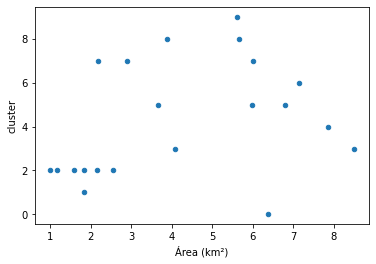

In [95]:
ax1 = df.plot.scatter(x='Área (km²)', y='cluster')

In [100]:
Area= np.array(df[['Área (km²)']]) .reshape(-1,1)
Cluster=np.array(df[['cluster']])

In [101]:
model = LinearRegression().fit(Area,Cluster)

In [102]:
r_sq = model.score(Poblacion,Cluster)

In [103]:
slope = model.coef_
slope

array([[0.36013979]])

In [104]:
intercept = model.intercept_
intercept

array([2.76350631])

In [105]:
Cluster_predicted = model.predict(Area)
Cluster_predicted

array([[3.42112156],
       [3.12076498],
       [3.18523   ],
       [3.34009011],
       [3.6786215 ],
       [3.53924741],
       [4.23575775],
       [4.16120882],
       [3.5482509 ],
       [3.80503057],
       [4.08377876],
       [5.06011772],
       [5.33706522],
       [4.78785204],
       [5.82541477],
       [5.58916307],
       [4.80513875],
       [4.92614572],
       [5.20741489],
       [4.91858279],
       [3.42400268]])

In [106]:
Cluster_new = intercept + slope * Area

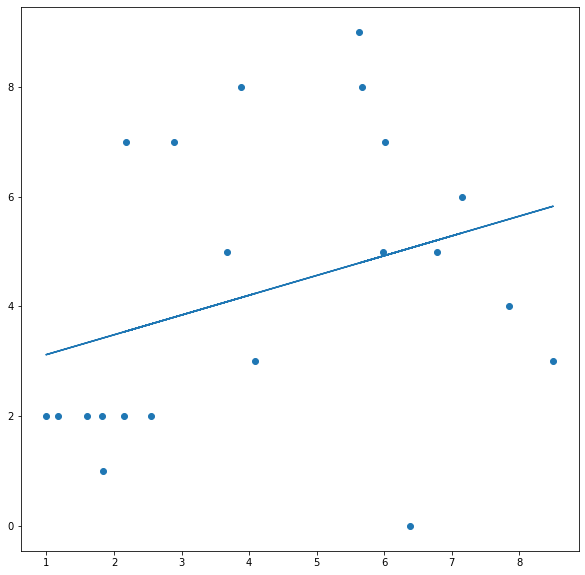

In [107]:
fig,ax = plt.subplots(figsize =(10,10))
plt.scatter(Area,Cluster)
plt.plot(Area, Cluster_new)